In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import torch
from torch_tools.visualization import to_image_grid

import numpy as np
import matplotlib.pyplot as plt

from inference import GeneratorWithFixedWeightDeformation
from loading import load_generator

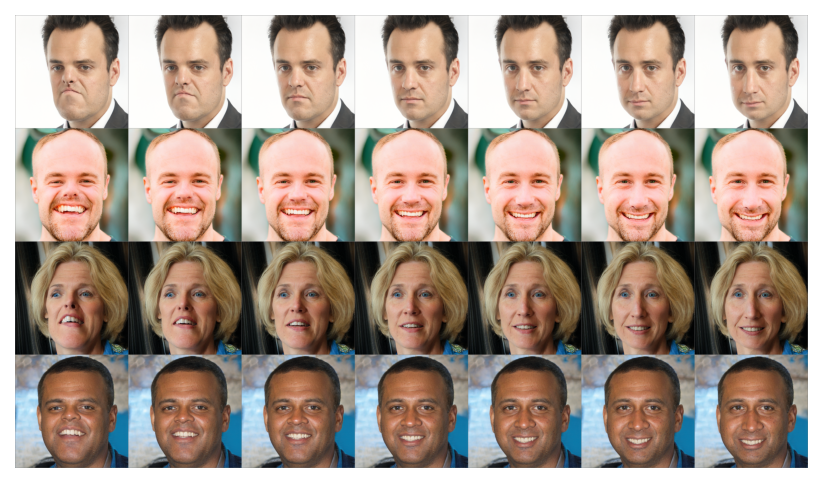

In [4]:
gen = load_generator(
    args={
        'resolution': {'horse': 256, 'church': 256, 'car': 512, 'ffhq': 1024}['ffhq'],
        'gan_type': 'StyleGAN2',
    },
    G_weights='pretrained/StyleGAN2/stylegan2-ffhq-config-f.pt'
)

source = 'pretrained/ffhq/nose_size.pt'
G = GeneratorWithFixedWeightDeformation(gen, source)


zs = torch.randn([4, 512], device='cuda')
imgs = []
n_steps = 7
with torch.no_grad():
    for i_scale in np.arange(n_steps):
        scale = 2.0 * float(i_scale) / (n_steps - 1) - 1.
        G.deformate(scale * G.scale)

        batch_size = 4
        imgs_batch = []
        for i in np.arange(0, len(zs), batch_size):
            imgs_batch.append(G(zs[i: i + batch_size]).cpu())

        imgs.append(torch.cat(imgs_batch))

imgs_grid = torch.cat([t for t in torch.stack(imgs).transpose(0, 1)])

plt.figure(figsize=(n_steps, len(zs)), dpi=150)
plt.axis('off')
plt.imshow(to_image_grid(torch.clamp(imgs_grid, -1, 1), nrow=n_steps))